# EDA

In [1]:
%matplotlib inline


# Essential libraries
import os
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime, timedelta
from pathlib import Path

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import seaborn as sns

# SQL Component
from urllib.request import urlretrieve
import sqlite3

# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


## SciKit Learning Preprocessing  
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## SciKit Learn ML Models
from sklearn.linear_model import Lasso

## Data Download

In [2]:
url = 'https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db'

file_path = Path('./src/data/score.db')

if file_path.exists():
    print('File already exist, skip download.')
else:
    try:
        print('Downloading Data File')
        urlretrieve(url, file_path)
        print('Download completed')
    except:
        print("Error downloading file. Please check if the file exist at the location:", url)
        print("Please also check if Internet connection is present.")



File already exist, skip download.


## Import Data to DataFrame

In [3]:
list_all_tables = "SELECT name FROM sqlite_master WHERE type='table';"

conn = sqlite3.connect(file_path)
cur = conn.cursor()
cur.execute(list_all_tables)
tables_all = cur.fetchall()[0]
tables_all = list(tables_all)
print(tables_all)
conn.close()

['score']


In [4]:
read_table = 'SELECT * FROM ' + tables_all[0]
print(read_table)

SELECT * FROM score


In [5]:
conn = sqlite3.connect('./src/data/score.db')
df = pd.read_sql(read_table, conn)
conn.close()

## Display Dataframe and Basic Information

In [6]:
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


<font color='blue'>
    
**The index is duplicated. Need to reset index.**

#### Reset Index

In [7]:
df.set_index('index', inplace=True)
df

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
index,,,,,,,,,,,,,,,,,
0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red


In [8]:
m = len(df)
print(f"There are a total of {m} records.")

There are a total of 15900 records.


#### Display Basic Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15900 entries, 0 to 15899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15900 non-null  int64  
 1   direct_admission    15900 non-null  object 
 2   CCA                 15900 non-null  object 
 3   learning_style      15900 non-null  object 
 4   student_id          15900 non-null  object 
 5   gender              15900 non-null  object 
 6   tuition             15900 non-null  object 
 7   final_test          15405 non-null  float64
 8   n_male              15900 non-null  float64
 9   n_female            15900 non-null  float64
 10  age                 15900 non-null  float64
 11  hours_per_week      15900 non-null  float64
 12  attendance_rate     15122 non-null  float64
 13  sleep_time          15900 non-null  object 
 14  wake_time           15900 non-null  object 
 15  mode_of_transport   15900 non-null  object 
 16  bag_color

In [10]:
df.info

<bound method DataFrame.info of        number_of_siblings direct_admission     CCA learning_style student_id  \
index                                                                          
0                       0              Yes  Sports         Visual     ACN2BE   
1                       2               No  Sports       Auditory     FGXIIZ   
2                       0              Yes    None         Visual     B9AI9F   
3                       1               No   Clubs       Auditory     FEVM1T   
4                       0               No  Sports       Auditory     AXZN2E   
...                   ...              ...     ...            ...        ...   
15895                   1               No   Clubs         Visual     XPECN2   
15896                   1              Yes    None       Auditory     7AMC7S   
15897                   1              Yes  Sports       Auditory     XKZ6VN   
15898                   1               No   Clubs         Visual     2OU4UQ   
15899   

In [11]:
df.describe()

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
count,15900.000000,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000
mean,0.886541,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268
std,0.751346,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230
min,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000
25%,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000
50%,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000
75%,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000
max,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000


<font color='blue'>
    
**The count of `final_test` and `attendance_rate` is different from other columns, need to explore further.**

In [12]:
df.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            495
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       778
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

<font color='blue'>

**We need to address the null values for the column `final_test` which is the target and the column `attendance_rate` which is one of the features.**

#### Checking `student_id`

**There is a column known as `student_id` which potentially can be used as index.**

In [13]:
len(df['student_id'].unique())

15000

<font color = 'blue'>

**The student_id is not unique since there are a total of 15900 records, unique values is only 15000 records.**

In [14]:
duplicated_student_id_records = df[df['student_id'].duplicated(keep=False)]
duplicated_student_id_records = duplicated_student_id_records.sort_values(by='student_id')
duplicated_student_id_records

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
index,,,,,,,,,,,,,,,,,
5534,0,No,Clubs,Auditory,00811H,Female,Yes,88.0,21.0,4.0,15.0,8.0,92.0,23:00,7:00,walk,green
12290,0,No,Clubs,Auditory,00811H,Female,Yes,88.0,21.0,4.0,15.0,8.0,92.0,23:00,7:00,walk,white
12270,1,No,Arts,Visual,0195IO,Female,No,52.0,8.0,22.0,16.0,15.0,99.0,22:00,6:00,private transport,yellow
13541,1,No,Arts,Visual,0195IO,Female,No,52.0,8.0,22.0,16.0,15.0,99.0,22:00,6:00,private transport,yellow
4303,0,No,Clubs,Auditory,02RSAH,Female,Yes,64.0,12.0,9.0,15.0,17.0,97.0,22:00,6:00,private transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,0,No,None,Auditory,ZUGVXE,Female,No,67.0,24.0,3.0,16.0,9.0,91.0,21:30,5:30,public transport,blue
4429,1,No,Arts,Auditory,ZZICEC,Female,Yes,54.0,11.0,13.0,15.0,12.0,93.0,22:00,6:00,private transport,green
9953,1,No,Arts,Auditory,ZZICEC,Female,Yes,54.0,11.0,13.0,15.0,12.0,93.0,22:00,6:00,private transport,blue


<font color='blue'>

**There are 1800 duplicates, if we divide by 2, we have 900 extra records. This confirm the extra 900 records against 15000 unique records. Need to remove duplicates.**

#### Checking Categorical Columns

In [15]:
df.info

<bound method DataFrame.info of        number_of_siblings direct_admission     CCA learning_style student_id  \
index                                                                          
0                       0              Yes  Sports         Visual     ACN2BE   
1                       2               No  Sports       Auditory     FGXIIZ   
2                       0              Yes    None         Visual     B9AI9F   
3                       1               No   Clubs       Auditory     FEVM1T   
4                       0               No  Sports       Auditory     AXZN2E   
...                   ...              ...     ...            ...        ...   
15895                   1               No   Clubs         Visual     XPECN2   
15896                   1              Yes    None       Auditory     7AMC7S   
15897                   1              Yes  Sports       Auditory     XKZ6VN   
15898                   1               No   Clubs         Visual     2OU4UQ   
15899   

<font color='blue'>
    
**Identified categorical features are `direct_admission`, `CCA`, `learning_style`, `gender`, `tuition`, `mode_of_transport` and `bag_color`.**

**Also identified columns `sleep_time` and `wake_time` can be engineering to a single columns for total sleep time.**

In [16]:
df.head()

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
index,,,,,,,,,,,,,,,,,
0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


### Basic Analysis Summary

Base on the information above, we need to consider the following:

- The target `y_train` should be the `final_test` score.
- We need to remove duplicate records in the dataset
- We need to fix the null values in the dataset.
- We can consider converting `sleep_time` and `wake_time` to a new column to track sleep duration.
- All categorical features should be converted into one-hot encoding for machine learning. For EDA analysis, we will be using class index encoder.
- We will use correlational analysis to discover if `mode_of_transport` and `bag_color` affects the target score.

### Plan of Action

We also plan for the following actions:
1. We need to remove duplicate records in the dataset and set the index using `student_id`.
2. We need to remove the records of null values in `final_test`.
3. Perform data splitting to train and test data.
4. We will fill the null values with either the mean or median for the null values in the column `attendance_rate`.
5. We also need to convert the data of `sleep_time` and `wake_time` into date time format.
6. We also need an extra column, `sleep_hours` by subtracting the `sleep_time` and `wake_time`.
7. For EDA we convert all categorical data into class index for analysis. 
8. Use correlational analysis to check which features has the least correlation.

## Data Cleaning Before Data Split

In [17]:
m = len(df)
print(f"There are a total of {m} records.")

There are a total of 15900 records.


In [18]:
df.pivot_table(index=['student_id'], aggfunc='size')

student_id
004WW1    1
005YYS    1
00811H    2
00IX6J    1
00JSGS    1
         ..
ZZBJS5    1
ZZICEC    2
ZZIRE5    1
ZZN1C0    1
ZZNA57    2
Length: 15000, dtype: int64

<font color='red'>

**Will drop all 900 duplicate records.**

In [19]:
df2 = df.drop_duplicates('student_id')

In [20]:
df2

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
index,,,,,,,,,,,,,,,,,
0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red


<font color='red'>

**Use `student_id` as index.**

In [21]:
df2.set_index('student_id', inplace=True)

In [22]:
df2

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
student_id,,,,,,,,,,,,,,,,
ACN2BE,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
FGXIIZ,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
B9AI9F,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
FEVM1T,1,No,Clubs,Auditory,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
AXZN2E,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPECN2,1,No,Clubs,Visual,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
7AMC7S,1,Yes,None,Auditory,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
XKZ6VN,1,Yes,Sports,Auditory,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red


In [23]:
m = len(df2)
print(f"There are a total of {m} records.")

There are a total of 15000 records.


### Fixing Null Values on Target Column `final_test`

In [24]:
df2.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
gender                  0
tuition                 0
final_test            463
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       734
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

**As shown above, the target `final_test` has null values that need to be fixed.**

In [25]:
data_for_prediction = df[df['final_test'].isnull()]
data_for_prediction

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
index,,,,,,,,,,,,,,,,,
30,2,No,Sports,Visual,7882P8,Male,Yes,NaN,20.0,2.0,6.0,14.0,91.0,21:00,5:00,public transport,green
51,1,Yes,Clubs,Visual,6RUZRP,Male,Yes,NaN,14.0,7.0,15.0,9.0,90.0,23:00,7:00,walk,white
240,0,No,Sports,Auditory,3G6CHR,Female,No,NaN,2.0,20.0,16.0,13.0,100.0,21:30,5:30,public transport,red
280,1,No,Arts,Auditory,7BS39Q,Female,Yes,NaN,14.0,16.0,16.0,8.0,93.0,23:30,6:30,private transport,yellow
331,1,No,Clubs,Auditory,8895J7,Male,Y,NaN,22.0,5.0,16.0,20.0,100.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,2,No,Arts,Visual,TAMAJ0,Male,No,NaN,17.0,2.0,15.0,8.0,96.0,21:00,5:00,public transport,green
15814,0,No,Arts,Auditory,HL7EEZ,Male,Yes,NaN,12.0,9.0,16.0,9.0,96.0,21:00,5:00,public transport,yellow
15849,0,No,Arts,Visual,M5KIUZ,Female,Y,NaN,4.0,17.0,15.0,20.0,98.0,22:00,6:00,private transport,black


In [26]:
final_test_null = len(df2[df2['final_test'].isnull()])
pcent_final_test_null = round(final_test_null/m * 100, 2)
print(f"The total number of records with null value for column 'final_test' is {final_test_null}. This constitute {pcent_final_test_null}% against a record of {m} records.")

The total number of records with null value for column 'final_test' is 463. This constitute 3.09% against a record of 15000 records.


<font color='red'>

**Since we will be removing only 3% of the data. We can drop the data with null values on the column `final_test`.**

**Please note that although we cannot use the data above for training or test. We can use the data for actual prediction.**

In [27]:
df2 = df2.drop(df2[df2['final_test'].isnull()].index)

In [28]:
df2

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
student_id,,,,,,,,,,,,,,,,
ACN2BE,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
FGXIIZ,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
B9AI9F,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
FEVM1T,1,No,Clubs,Auditory,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
AXZN2E,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPECN2,1,No,Clubs,Visual,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
7AMC7S,1,Yes,None,Auditory,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
XKZ6VN,1,Yes,Sports,Auditory,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red


In [29]:
df2.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
gender                  0
tuition                 0
final_test              0
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       713
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

In [30]:
m = len(df2)
print(f"Total number of records is now {m} records after data cleaning.")

Total number of records is now 14537 records after data cleaning.


## Data Split 

In [31]:
y = df2['final_test']
X = df2.drop(columns=['final_test'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
print('Size of X_train is:', len(X_train))
print('Size of y_train is:', len(y_train))
print('Size of X_test is:', len(X_test))
print('Size of y_test is:', len(y_test))

Size of X_train is: 11629
Size of y_train is: 11629
Size of X_test is: 2908
Size of y_test is: 2908


After the spliting of training and test data. All following data processing will be done on X_train and X_test.

### Fixing Null Values on Column `attendance_rate`

In [33]:
X_train[X_train['attendance_rate'].isnull()]

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
student_id,,,,,,,,,,,,,,,
39K2XJ,1,No,Clubs,Visual,Male,No,24.0,2.0,15.0,16.0,NaN,21:30,5:30,public transport,white
H01QU0,1,Yes,ARTS,Auditory,Male,No,10.0,7.0,15.0,6.0,NaN,22:30,6:30,private transport,red
JZ35XJ,1,No,Sports,Auditory,Male,Yes,23.0,5.0,15.0,18.0,NaN,21:30,5:30,public transport,green
EZFQFF,0,No,None,Visual,Female,Yes,23.0,1.0,15.0,6.0,NaN,21:30,5:30,public transport,white
SFFZZ6,1,No,Clubs,Visual,Male,No,21.0,7.0,16.0,11.0,NaN,1:30,6:30,private transport,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SZ3TKT,1,No,Clubs,Auditory,Male,No,24.0,6.0,16.0,14.0,NaN,22:00,5:00,public transport,green
JF6QG2,0,No,Sports,Visual,Female,No,26.0,1.0,16.0,8.0,NaN,23:00,7:00,walk,yellow
GKD7AO,2,Yes,Arts,Visual,Female,Yes,14.0,0.0,16.0,15.0,NaN,21:00,5:00,public transport,red


In [34]:
X_train_attendance_rate_null = len(X_train[X_train['attendance_rate'].isnull()])
X_train_pcent_attendance_rate_null = round(X_train_attendance_rate_null/m * 100, 2)
print(f"The total number of records with null value for column 'attendance_rate' is {X_train_attendance_rate_null}. This constitute {X_train_pcent_attendance_rate_null}% against a record of {len(X_train)} records.")

The total number of records with null value for column 'attendance_rate' is 568. This constitute 3.91% against a record of 11629 records.


In [35]:
X_test[X_test['attendance_rate'].isnull()]

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
student_id,,,,,,,,,,,,,,,
4QPNEA,1,No,ARTS,Visual,Male,Yes,24.0,4.0,16.0,7.0,NaN,22:30,6:30,private transport,blue
GIU7EK,1,No,None,Visual,Male,No,10.0,14.0,15.0,13.0,NaN,21:00,5:00,public transport,blue
QHZMXA,2,No,Arts,Auditory,Male,No,12.0,7.0,16.0,8.0,NaN,22:00,6:00,private transport,green
KFKCMR,0,No,None,Auditory,Male,Yes,22.0,1.0,15.0,13.0,NaN,22:00,6:00,private transport,green
1FA9NG,1,Yes,None,Auditory,Male,Yes,12.0,10.0,16.0,9.0,NaN,23:00,7:00,walk,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4AEWYW,1,No,Clubs,Visual,Male,No,17.0,8.0,15.0,7.0,NaN,22:30,6:30,private transport,red
11RQTT,2,No,Sports,Visual,Male,No,22.0,0.0,15.0,16.0,NaN,21:00,5:00,public transport,yellow
HCNDZO,1,No,Clubs,Auditory,Female,No,10.0,17.0,16.0,18.0,NaN,21:30,5:30,public transport,white


In [36]:
X_test_attendance_rate_null = len(X_test[X_test['attendance_rate'].isnull()])
X_test_pcent_attendance_rate_null = round(X_test_attendance_rate_null/m * 100, 2)
print(f"The total number of records with null value for column 'attendance_rate' is {X_test_attendance_rate_null}. This constitute {X_test_pcent_attendance_rate_null}% against a record of {len(X_test)} records.")

The total number of records with null value for column 'attendance_rate' is 145. This constitute 1.0% against a record of 2908 records.


**We can replace the null value with either the average or median of the existing attendance records.**

In [37]:
X_train_attendance_mean = round(X_train['attendance_rate'].mean(),2)
X_train_attendance_median  = round(X_train['attendance_rate'].median(),2)
print(f"Base on existing attendance record, the average is {X_train_attendance_mean} and the median is {X_train_attendance_median}.")

Base on existing attendance record, the average is 93.26 and the median is 95.0.


In [38]:
X_test_attendance_mean = round(X_test['attendance_rate'].mean(),2)
X_test_attendance_median  = round(X_test['attendance_rate'].median(),2)
print(f"Base on existing attendance record, the average is {X_test_attendance_mean} and the median is {X_test_attendance_median}.")

Base on existing attendance record, the average is 93.35 and the median is 95.0.


<font color='red'>
    
**We will replace null values in the column `attendance_rate` with the median values.**
</font>

In [39]:
X_train['attendance_rate'] = X_train['attendance_rate'].fillna(X_train['attendance_rate'].median())
X_test['attendance_rate'] = X_test['attendance_rate'].fillna(X_test['attendance_rate'].median())

In [40]:
X_train.isnull().sum()

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
gender                0
tuition               0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
bag_color             0
dtype: int64

In [41]:
X_test.isnull().sum()

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
gender                0
tuition               0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
bag_color             0
dtype: int64

## Feature Engineering

### Computing Hours Sleep

<font color='red'>

**We will convert `sleep_time` and `wake_time` to date time format and add a new column `sleep_hours` to record the total sleep duration.**


In [42]:
X_train.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
student_id,,,,,,,,,,,,,,,
Q0IP63,2,Yes,None,Visual,Male,No,15.0,5.0,15.0,17.0,99.0,23:00,7:00,walk,red
OTM2LZ,2,No,Clubs,Visual,Male,No,13.0,9.0,15.0,20.0,96.0,22:30,6:30,private transport,black
BMEAE7,1,No,Arts,Auditory,Female,No,5.0,24.0,16.0,3.0,91.0,22:30,6:30,private transport,white
FRZTOU,1,No,None,Visual,Male,Yes,16.0,8.0,15.0,16.0,96.0,21:00,5:00,public transport,red
QTGUKQ,2,No,Sports,Visual,Male,No,12.0,5.0,16.0,5.0,92.0,22:30,6:30,private transport,black


In [43]:
X_train.shape

(11629, 15)

In [44]:
X_train['sleep_time'] = pd.to_datetime(X_train['sleep_time'], format='%H:%M')
X_train['wake_time'] = pd.to_datetime(X_train['wake_time'], format='%H:%M')

In [45]:
X_train['sleep_hours'] = (X_train['wake_time']- X_train['sleep_time']).dt.components.hours

In [46]:
X_train['sleep_hours'].describe()

count    11629.000000
mean         7.842291
std          0.610140
min          4.000000
25%          8.000000
50%          8.000000
75%          8.000000
max          8.000000
Name: sleep_hours, dtype: float64

In [47]:
X_train.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color,sleep_hours
student_id,,,,,,,,,,,,,,,,
Q0IP63,2,Yes,None,Visual,Male,No,15.0,5.0,15.0,17.0,99.0,1900-01-01 23:00:00,1900-01-01 07:00:00,walk,red,8
OTM2LZ,2,No,Clubs,Visual,Male,No,13.0,9.0,15.0,20.0,96.0,1900-01-01 22:30:00,1900-01-01 06:30:00,private transport,black,8
BMEAE7,1,No,Arts,Auditory,Female,No,5.0,24.0,16.0,3.0,91.0,1900-01-01 22:30:00,1900-01-01 06:30:00,private transport,white,8
FRZTOU,1,No,None,Visual,Male,Yes,16.0,8.0,15.0,16.0,96.0,1900-01-01 21:00:00,1900-01-01 05:00:00,public transport,red,8
QTGUKQ,2,No,Sports,Visual,Male,No,12.0,5.0,16.0,5.0,92.0,1900-01-01 22:30:00,1900-01-01 06:30:00,private transport,black,8


<font color='red'>

**We will drop the two columns `sleep_time` and `wake_time`.**

In [48]:
X_train.drop(columns=['sleep_time', 'wake_time'], inplace=True)

In [49]:
X_train.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
student_id,,,,,,,,,,,,,,
Q0IP63,2,Yes,None,Visual,Male,No,15.0,5.0,15.0,17.0,99.0,walk,red,8
OTM2LZ,2,No,Clubs,Visual,Male,No,13.0,9.0,15.0,20.0,96.0,private transport,black,8
BMEAE7,1,No,Arts,Auditory,Female,No,5.0,24.0,16.0,3.0,91.0,private transport,white,8
FRZTOU,1,No,None,Visual,Male,Yes,16.0,8.0,15.0,16.0,96.0,public transport,red,8
QTGUKQ,2,No,Sports,Visual,Male,No,12.0,5.0,16.0,5.0,92.0,private transport,black,8


In [50]:
X_train.shape

(11629, 14)

### Computing Hours Sleep for Test Dataset

In [51]:
X_test['sleep_time'] = pd.to_datetime(X_test['sleep_time'], format='%H:%M')
X_test['wake_time'] = pd.to_datetime(X_test['wake_time'], format='%H:%M')
X_test['sleep_hours'] = (X_test['wake_time']- X_test['sleep_time']).dt.components.hours
X_test.drop(columns=['sleep_time', 'wake_time'], inplace=True)

### Feature Engineering (Categorical Encoding)

<font color='blue'>

**The following will convert all categorical features into class index for analysis. We will use one-hot encoding for machine learning**

In [52]:
X_train.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
student_id,,,,,,,,,,,,,,
Q0IP63,2,Yes,None,Visual,Male,No,15.0,5.0,15.0,17.0,99.0,walk,red,8
OTM2LZ,2,No,Clubs,Visual,Male,No,13.0,9.0,15.0,20.0,96.0,private transport,black,8
BMEAE7,1,No,Arts,Auditory,Female,No,5.0,24.0,16.0,3.0,91.0,private transport,white,8
FRZTOU,1,No,None,Visual,Male,Yes,16.0,8.0,15.0,16.0,96.0,public transport,red,8
QTGUKQ,2,No,Sports,Visual,Male,No,12.0,5.0,16.0,5.0,92.0,private transport,black,8


#### Checking Classifications Details

In [53]:
print('direct_admission:', X_train['direct_admission'].unique())
print('CCA:', X_train['CCA'].unique())
print('learning_style:', X_train['learning_style'].unique())
print('gender:', X_train['gender'].unique())
print('tuition:', X_train['tuition'].unique())
print('mode_of_transport:', X_train['mode_of_transport'].unique())
print('bag_color:', X_train['bag_color'].unique())

direct_admission: ['Yes' 'No']
CCA: ['None' 'Clubs' 'Arts' 'Sports' 'SPORTS' 'CLUBS' 'ARTS' 'NONE']
learning_style: ['Visual' 'Auditory']
gender: ['Male' 'Female']
tuition: ['No' 'Yes' 'Y' 'N']
mode_of_transport: ['walk' 'private transport' 'public transport']
bag_color: ['red' 'black' 'white' 'blue' 'yellow' 'green']


**There are similar classification with duplicated heading on `CCA` and `tuition`.**

In [54]:
X_train['CCA'] = X_train['CCA'].str.capitalize()
print('CCA:', X_train['CCA'].unique())

CCA: ['None' 'Clubs' 'Arts' 'Sports']


In [55]:
X_train['tuition'] = X_train['tuition'].replace('Y', value='Yes')
X_train['tuition'] = X_train['tuition'].replace('N', value='No')
print('tuition:', X_train['tuition'].unique())

tuition: ['No' 'Yes']


<font color='red'>

**Convert all categorical data to class index.**

In [56]:
categorical_columns = ['direct_admission', 'CCA', 'learning_style', 'gender', 'tuition', 'mode_of_transport', 'bag_color']
encoder = preprocessing.OrdinalEncoder()

In [57]:
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])

In [58]:
X_train.shape

(11629, 14)

In [59]:
X_train.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
student_id,,,,,,,,,,,,,,
Q0IP63,2,1.0,2.0,1.0,1.0,0.0,15.0,5.0,15.0,17.0,99.0,2.0,3.0,8
OTM2LZ,2,0.0,1.0,1.0,1.0,0.0,13.0,9.0,15.0,20.0,96.0,0.0,0.0,8
BMEAE7,1,0.0,0.0,0.0,0.0,0.0,5.0,24.0,16.0,3.0,91.0,0.0,4.0,8
FRZTOU,1,0.0,2.0,1.0,1.0,1.0,16.0,8.0,15.0,16.0,96.0,1.0,3.0,8
QTGUKQ,2,0.0,3.0,1.0,1.0,0.0,12.0,5.0,16.0,5.0,92.0,0.0,0.0,8


In [60]:
X_train.columns

Index(['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
       'gender', 'tuition', 'n_male', 'n_female', 'age', 'hours_per_week',
       'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_hours'],
      dtype='object')

### Feature Engineering (Categorical Encoding) for Test Data

In [61]:
X_test['CCA'] = X_test['CCA'].str.capitalize()
X_test['tuition'] = X_test['tuition'].replace('Y', value='Yes')
X_test['tuition'] = X_test['tuition'].replace('N', value='No')

In [62]:
X_test[categorical_columns] = encoder.fit_transform(X_test[categorical_columns])

In [63]:
X_test.shape

(2908, 14)

In [64]:
X_test.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
student_id,,,,,,,,,,,,,,
FW2G55,1,1.0,2.0,0.0,1.0,1.0,16.0,5.0,15.0,10.0,95.0,1.0,2.0,8
QDK4YW,1,0.0,1.0,0.0,0.0,1.0,8.0,20.0,15.0,6.0,94.0,0.0,5.0,8
U65A8I,2,0.0,0.0,0.0,0.0,1.0,14.0,6.0,16.0,9.0,96.0,1.0,4.0,8
9MN5ZU,2,1.0,3.0,1.0,1.0,1.0,14.0,0.0,15.0,7.0,91.0,0.0,3.0,8
MU9VEB,1,1.0,2.0,0.0,1.0,0.0,24.0,1.0,15.0,7.0,99.0,0.0,0.0,8


In [65]:
X_test.columns

Index(['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
       'gender', 'tuition', 'n_male', 'n_female', 'age', 'hours_per_week',
       'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_hours'],
      dtype='object')

## Feature Analysis

In [66]:
df3 = pd.concat([y_train, X_train], axis=1)

In [67]:
df3.head()

,final_test,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
student_id,,,,,,,,,,,,,,,
Q0IP63,71.0,2,1.0,2.0,1.0,1.0,0.0,15.0,5.0,15.0,17.0,99.0,2.0,3.0,8
OTM2LZ,56.0,2,0.0,1.0,1.0,1.0,0.0,13.0,9.0,15.0,20.0,96.0,0.0,0.0,8
BMEAE7,48.0,1,0.0,0.0,0.0,0.0,0.0,5.0,24.0,16.0,3.0,91.0,0.0,4.0,8
FRZTOU,72.0,1,0.0,2.0,1.0,1.0,1.0,16.0,8.0,15.0,16.0,96.0,1.0,3.0,8
QTGUKQ,77.0,2,0.0,3.0,1.0,1.0,0.0,12.0,5.0,16.0,5.0,92.0,0.0,0.0,8


In [68]:
df3.corr()

,final_test,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
final_test,1.000000,-0.360574,0.235034,0.107028,0.270015,0.014783,0.274529,-0.147837,-0.173787,0.014463,-0.150361,0.338419,-0.003674,0.008601,0.326746
number_of_siblings,-0.360574,1.000000,-0.025918,-0.043493,-0.008688,0.060878,-0.005758,-0.007714,-0.041677,-0.006314,0.078916,-0.113515,0.013784,0.004416,-0.102729
direct_admission,0.235034,-0.025918,1.000000,0.030645,0.102939,-0.017910,0.000076,-0.152678,-0.143728,0.008049,-0.151006,-0.010235,0.009201,-0.005957,-0.004435
CCA,0.107028,-0.043493,0.030645,1.000000,0.031261,-0.002283,0.034607,-0.020389,-0.019070,0.000876,-0.036282,0.000819,-0.003568,0.002057,0.005947
learning_style,0.270015,-0.008688,0.102939,0.031261,1.000000,0.023112,-0.053952,-0.019041,-0.039956,-0.008810,-0.087813,0.072722,0.004829,-0.002794,0.079324
gender,0.014783,0.060878,-0.017910,-0.002283,0.023112,1.000000,0.002569,0.370992,-0.378370,-0.009665,0.002958,0.020967,-0.010975,-0.010400,0.012189
tuition,0.274529,-0.005758,0.000076,0.034607,-0.053952,0.002569,1.000000,-0.055603,-0.069279,0.011410,0.010027,0.142187,-0.005456,-0.001473,0.137033
n_male,-0.147837,-0.007714,-0.152678,-0.020389,-0.019041,0.370992,-0.055603,1.000000,-0.794705,-0.000691,0.021738,-0.049012,0.003235,-0.011743,-0.051108
n_female,-0.173787,-0.041677,-0.143728,-0.019070,-0.039956,-0.378370,-0.069279,-0.794705,1.000000,-0.012392,0.029792,-0.051913,-0.010408,0.004312,-0.046166
age,0.014463,-0.006314,0.008049,0.000876,-0.008810,-0.009665,0.011410,-0.000691,-0.012392,1.000000,-0.005614,0.007951,-0.000197,-0.012811,0.001674


Base on the correlation statistics above, we can see that there is very little correlation between `mode_of_transport`, `bag_color` and `gender` with the target`final_test`.

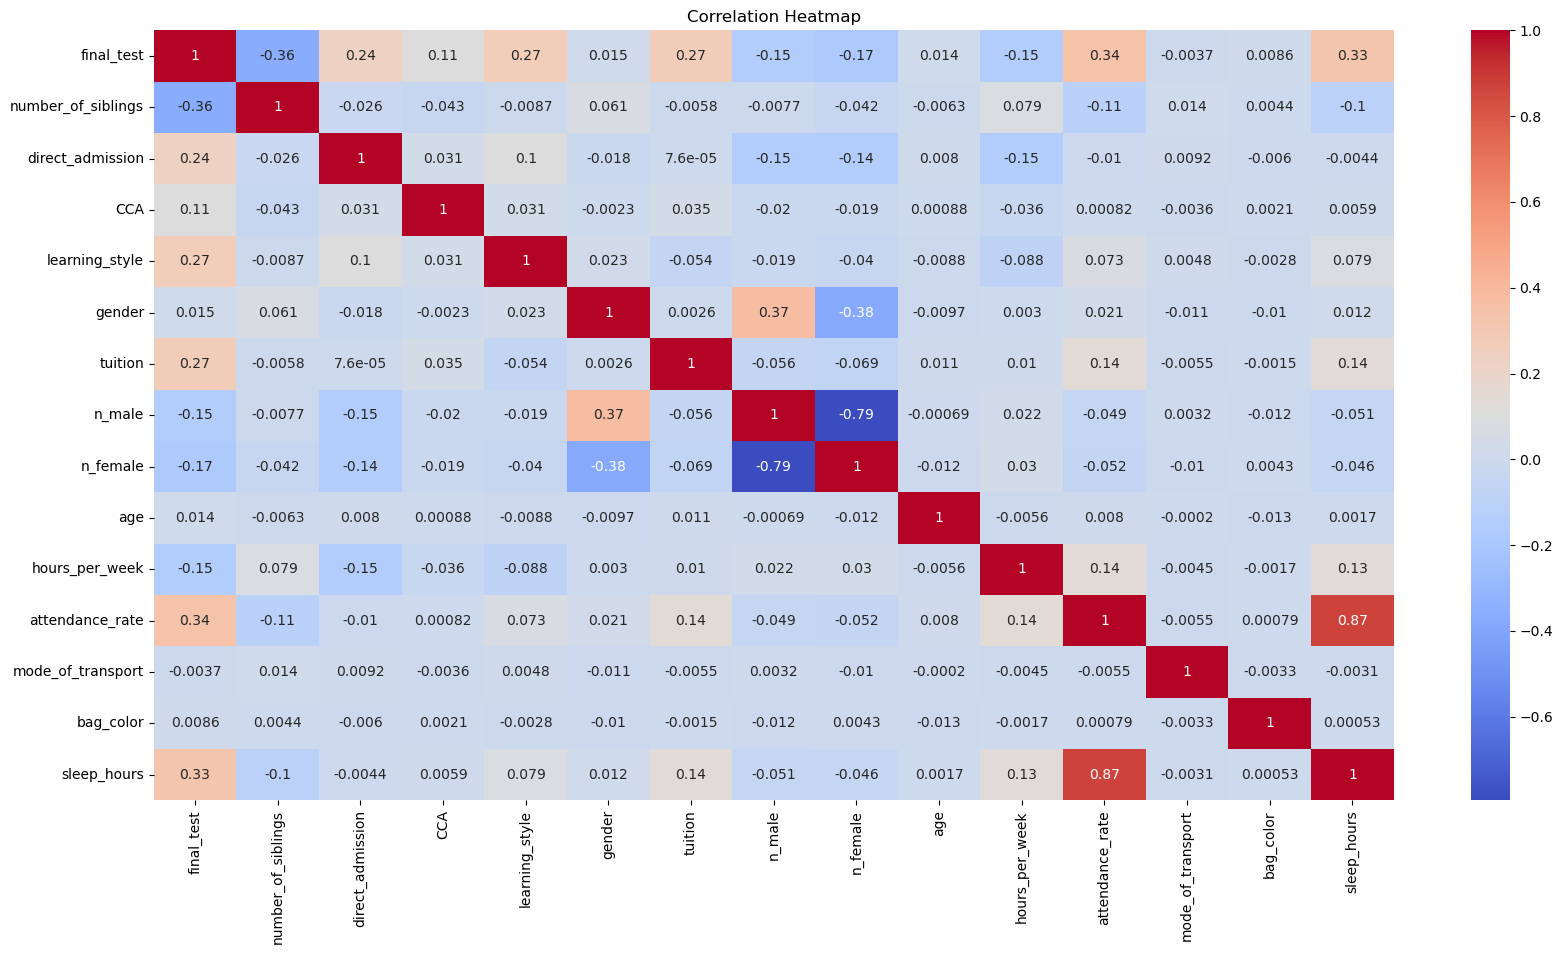

In [69]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df3.corr(), annot=True, cmap="coolwarm");
heatmap.set_title('Correlation Heatmap')
plt.show()

<font color='blue'>
    
**Base don the chart above, we can see that 4 features has low correlation with the target `final_test`.**

**They are:**
- age
- gender
- bag_color
- mode_of_transport

### Lasso Regression (Feature Selection)

In [70]:
degree = 1
lassoAlpha = 1
stepsLassoRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', Lasso(alpha=lassoAlpha, max_iter=10000, fit_intercept=True))
]

lassoPipe = Pipeline(stepsLassoRegression)

lassoPipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', Lasso(alpha=1, max_iter=10000))])

In [71]:
degree = 1
weightsLasso = None
alpha_list = np.arange(0.001,2.51,0.01)

for alpha in alpha_list:
    degree = 1
    lassoPipe['poly'].alpha = degree
    lassoPipe['model'].alpha = alpha
    lassoPipe['model'].max_iter=10000
    lassoPipe.fit(X_train, y_train)
    coef = lassoPipe['model'].coef_
    coef = np.insert(coef,0,alpha)
    #print(coef)
    if weightsLasso is None: 
        weightsLasso = np.array(coef).reshape(1,-1)
    else:
        weightsLasso = np.vstack((weightsLasso, coef))

In [72]:
feature_names  = list(lassoPipe['poly'].get_feature_names_out())
feature_headings = feature_names.copy()
feature_headings.insert(0,'alpha')
feature_headings

['alpha',
 'number_of_siblings',
 'direct_admission',
 'CCA',
 'learning_style',
 'gender',
 'tuition',
 'n_male',
 'n_female',
 'age',
 'hours_per_week',
 'attendance_rate',
 'mode_of_transport',
 'bag_color',
 'sleep_hours']

In [73]:
weightsLasso = pd.DataFrame(weightsLasso, columns = feature_headings)
weightsLasso

,alpha,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_hours
0,0.001,-13.437496,-0.393540,1.815612,5.956876,0.540410,4.744205,-45.030131,-45.076917,0.142523,-6.225241,14.174739,-0.095087,0.226309,7.404732
1,0.011,-13.342529,-0.125581,1.773316,5.947953,0.500071,4.795816,-43.551502,-43.657131,0.000000,-5.999563,13.729078,-0.023620,0.149289,7.471401
2,0.021,-13.257988,0.000000,1.729987,5.945931,0.457086,4.836055,-42.309793,-42.471626,0.000000,-5.800111,13.248738,-0.000000,0.070344,7.535279
3,0.031,-13.181768,0.011454,1.686089,5.949534,0.411643,4.868053,-41.249138,-41.467446,0.000000,-5.622221,12.738534,-0.000000,0.000000,7.599430
4,0.041,-13.096124,0.151073,1.642638,5.947171,0.369089,4.909497,-39.981547,-40.257697,0.000000,-5.420136,12.258633,-0.000000,0.000000,7.665616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2.461,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
247,2.471,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
248,2.481,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
249,2.491,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000


In [74]:
feature_names 

['number_of_siblings',
 'direct_admission',
 'CCA',
 'learning_style',
 'gender',
 'tuition',
 'n_male',
 'n_female',
 'age',
 'hours_per_week',
 'attendance_rate',
 'mode_of_transport',
 'bag_color',
 'sleep_hours']

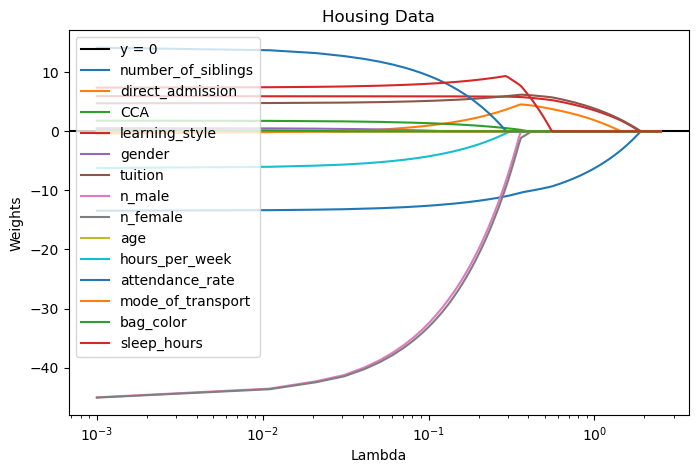

In [75]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in feature_names:
    ax1.plot(weightsLasso['alpha'], weightsLasso[f], label=str(f))
ax1.set_title('Housing Data')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()


In [76]:
weightsLasso.iloc[15]

alpha                  0.151000
number_of_siblings   -12.161419
direct_admission       1.689091
CCA                    1.164664
learning_style         5.919321
gender                 0.000000
tuition                5.365770
n_male               -26.083411
n_female             -26.898978
age                    0.000000
hours_per_week        -3.196338
attendance_rate        6.963780
mode_of_transport     -0.000000
bag_color              0.000000
sleep_hours            8.400021
Name: 15, dtype: float64

## Conclusion

**Base on the heat map we can conclude that attendance rate and number of sleep hours has the most positive impact on students result. This is follow by tuition and learning style. The type of admission also has some impact on the student result. CCA activities has little impact on the final test result. Number of siblings and type of classmate has inverse impact on the final test.** 